### Importar Bibliotecas

In [0]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
import joblib

### Importar data set

In [0]:
# Carregar o Dataset
data = load_iris()

# Construir o Dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)

# Variavel target
df['target'] = data.target

In [0]:
#Head
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
# Dimensão do data frame
df.shape

Out[4]: (150, 5)

In [0]:
# Verificação dos Dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Analise Exploratoria dos Dados

In [0]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [0]:
# Variavel target
df['target'].value_counts()

Out[7]: 0    50
1    50
2    50
Name: target, dtype: int64

In [0]:
# Correlação entre as variaveis
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Out[9]: <function matplotlib.pyplot.show(close=None, block=None)>

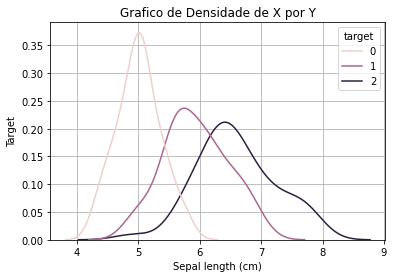

In [0]:
sns.kdeplot(data=df, x= 'sepal length (cm)' , hue= 'target')
plt.title('Grafico de Densidade de X por Y')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Target') 
plt.grid(True)
plt.show

Out[10]: <function matplotlib.pyplot.show(close=None, block=None)>

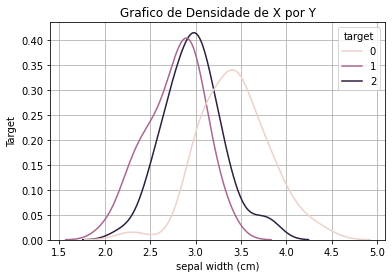

In [0]:
sns.kdeplot(data=df, x= 'sepal width (cm)', hue= 'target')
plt.title('Grafico de Densidade de X por Y')
plt.xlabel('sepal width (cm)')
plt.ylabel('Target')
plt.grid(True)
plt.show

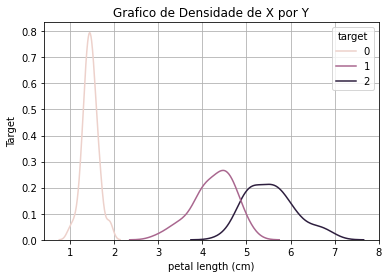

In [0]:
sns.kdeplot(data = df, x ='petal length (cm)', hue = 'target')
plt.title('Grafico de Densidade de X por Y')
plt.xlabel('petal length (cm)')
plt.ylabel('Target')
plt.grid(True)
plt.show()

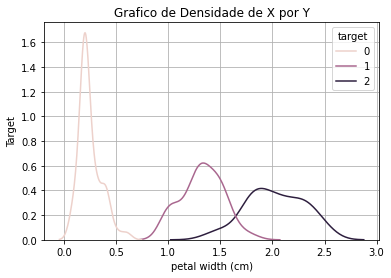

In [0]:
sns.kdeplot(data = df, x ='petal width (cm)', hue = 'target')
plt.title('Grafico de Densidade de X por Y')
plt.xlabel('petal width (cm)')
plt.ylabel('Target')
plt.grid(True)
plt.show()

### Modelagem

In [0]:
df.columns

Out[13]: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [0]:
#Features de Entrada/input
X = df[[
    'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'
]]

y = df['target']

In [0]:
# Split conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
# Treinando o modelo
RL = RandomForestClassifier(n_estimators = 5, max_depth = 14, min_samples_leaf = 4 ).fit(X_train, y_train)

In [0]:
# Predict
y_pre_train = RL.predict(X_train)
y_pre_test = RL.predict(X_test)

In [0]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_train, y_pre_train, target_names= target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        40
     class 1       0.97      0.92      0.95        38
     class 2       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [0]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pre_test, target_names= target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        10
     class 1       1.00      0.83      0.91        12
     class 2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



### Salvar Modelo

In [0]:
joblib.dump(RL, 'Modelo_treinado.pkl')

Out[20]: ['Modelo_treinado.pkl']